In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
mushroom = pd.read_csv(r"C:\Users\Meiyappan\Desktop\DS_DATASETS\mushrooms.csv")

mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
mushroom.shape

(8124, 23)

In [9]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [10]:
mushroom.describe(include="all")

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


#### STEP 1 : NULL VALUES HANDLING 

In [11]:
# No Null values present in the model

mushroom.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### STEP 2 : OUTLIERS

In [12]:
# In classification there is no need of considering outliers in the model

#### STEP 3: SCALING

In [13]:
# all the datas are in the object, so need of scaling

#### STEP 4: CATEGORICAL VALUES HANDLING

In [14]:
# converting the dependent variable using Label Encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

mushroom = mushroom.apply(le.fit_transform) # Label encoder for Multiple columns

In [15]:
mushroom = pd.DataFrame(mushroom)

mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


C:\Users\Meiyappan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='class', ylabel='Density'>

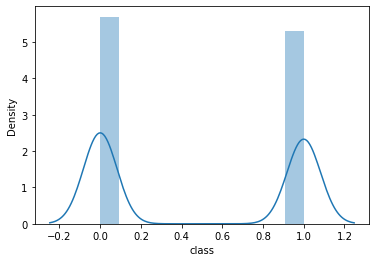

In [16]:
sns.distplot(mushroom["class"])

In [17]:
# sns.pairplot(mushroom)

In [18]:
correlation = mushroom.corr()

correlation

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [19]:
x = mushroom.drop(["class"], axis=1)

y = mushroom["class"]

In [ ]:
# cap-surface, gill-spacing, habitat

In [20]:
import statsmodels.api as sm

reg = sm.OLS(y, x).fit()

reg.summary()

C:\Users\Meiyappan\anaconda3\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  class   R-squared (uncentered):                   0.863
Model:                            OLS   Adj. R-squared (uncentered):              0.863
Method:                 Least Squares   F-statistic:                              2439.
Date:                Fri, 04 Dec 2020   Prob (F-statistic):                        0.00
Time:                        20:39:41   Log-Likelihood:                         -476.91
No. Observations:                8124   AIC:                                      995.8
Df Residuals:                    8103   BIC:                                      1143.
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cap-shape                    0.0022      0.002      1.208      0.227      -0.001       0.006
cap-surface                  0.0299      0.003     11.702      0.000       0.025       0.035
cap-color                    0.0045      0.001      3.332      0.001       0.002       0.007
bruises                     -0.4526      0.012    -36.226      0.000      -0.477      -0.428
odor                        -0.0202      0.002    -11.054      0.000      -0.024      -0.017
gill-attachment             -0.2216      0.046     -4.794      0.000      -0.312      -0.131
gill-spacing                -0.5369      0.015    -35.549      0.000      -0.567      -0.507
gill-size                    0.5270      0.012     42.837      0.000       0.503       0.551
gill-color                  -0.0066      0.001     -5.507      0.000      -0.009      -0.004
stalk-shape                  0.0149      0.012      1.296      0.195      -0.008       0.037
stalk-root                  -0.0545      0.005    -10.302      0.000      -0.065      -0.044
stalk-surface-above-ring    -0.1482      0.006    -25.727      0.000      -0.159      -0.137
stalk-surface-below-ring    -0.0465      0.006     -8.272      0.000      -0.057      -0.035
stalk-color-above-ring      -0.0074      0.002     -3.830      0.000      -0.011      -0.004
stalk-color-below-ring      -0.0038      0.002     -1.972      0.049      -0.008   -2.18e-05
veil-type                 8.288e-16   1.13e-16      7.328      0.000    6.07e-16    1.05e-15
veil-color                   0.6015      0.024     24.969      0.000       0.554       0.649
ring-number                  0.1537      0.021      7.356      0.000       0.113       0.195
ring-type                    0.0316      0.004      8.821      0.000       0.025       0.039
spore-print-color           -0.0496      0.003    -18.229      0.000      -0.055      -0.044
population                  -0.0021      0.003     -0.617      0.537      -0.009       0.005
habitat                      0.0214      0.002     10.271      0.000       0.017       0.026
==============================================================================
Omnibus:                     1381.409   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13249.474
Skew:                          -0.527   Prob(JB):                         0.00
Kurtosis:                       9.167   Cond. No.                     1.55e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly s

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF score'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

vif(x)

C:\Users\Meiyappan\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF score
0,cap-shape,5.463186
1,cap-surface,3.904712
2,cap-color,5.950600
3,bruises,7.984231
4,odor,8.918271
5,gill-attachment,256.122838
6,gill-spacing,4.534113
7,gill-size,5.758180
8,gill-color,6.284702
9,stalk-shape,9.243136


In [74]:
x = mushroom[['cap-shape','cap-surface', 'gill-size', 'gill-spacing', 'habitat']]

# x = mushroom.drop(["class"], axis=1)

y = mushroom["class"]

In [75]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [76]:
# which is nearly balanced data no need to balance it

y_train.value_counts(dropna=False)

0    3382
1    3117
Name: class, dtype: int64

In [98]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

log.fit(x_train, y_train)

LogisticRegression()

In [99]:
log.score(x_test, y_test)

0.7550769230769231

In [79]:
log.predict(x_test)

array([0, 1, 0, ..., 1, 0, 1])

In [80]:
metrics.confusion_matrix(y_test, log.predict(x_test))

array([[765,  61],
       [337, 462]], dtype=int64)

In [81]:
print(metrics.classification_report(y_test, log.predict(x_test)))

              precision    recall  f1-score   support

           0       0.69      0.93      0.79       826
           1       0.88      0.58      0.70       799

    accuracy                           0.76      1625
   macro avg       0.79      0.75      0.75      1625
weighted avg       0.79      0.76      0.75      1625



In [82]:
metrics.log_loss(y_test, log.predict_proba(x_test))

0.45754100710942236

In [71]:
metrics.roc_auc_score(y_test, log.predict(x_test))

0.7253800907308471

In [84]:
FPR, TPR, threshold = metrics.roc_curve(y_test, log.predict(x_test))

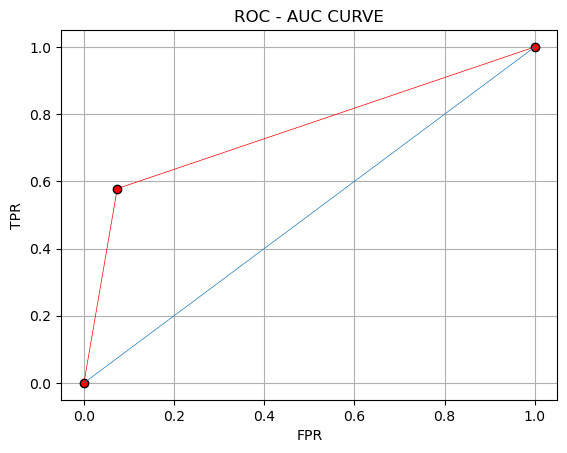

In [97]:
%matplotlib inline

from matplotlib import style
style.use('default')

plt.plot(FPR, TPR, c='red', marker='o', markeredgecolor='black', linewidth=0.5)
plt.plot([1,0],[1,0],linewidth=0.5)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC - AUC CURVE')
plt.grid()
plt.show()